In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#path for data
daily_master_path = 'Resources/daily_returns_master.csv'
daily_stats_path = 'Resources/average_daily_statistics.csv'
yearly_master_path = 'Resources/yearly_returns_master.csv'
yearly_stats_path = 'Resources/average_yearly_statistics.csv'
kaggle_clean_path = 'Resources/kaggle_clean.csv'
#load data into pandas
daily_master_df = pd.read_csv(daily_master_path)
daily_stats_df = pd.read_csv(daily_stats_path)
yearly_stats_df = pd.read_csv(yearly_stats_path)
yearly_master_df = pd.read_csv(yearly_master_path)
kaggle_clean_df = pd.read_csv(kaggle_clean_path)

In [4]:
#Generate symbol list for each classification
symbols = daily_master_df['symbol'].unique()
ai_symbols = kaggle_clean_df['symbol'].unique()
index_symbols = np.array([sym for sym in symbols if sym not in ai_symbols])

In [5]:
daylie_cumulative_returns = pd.DataFrame()

In [6]:
symbol_order = list(symbols)
yearly_cuml_returns = []
for symbol in symbols:
    temp_df = yearly_master_df[yearly_master_df['symbol'].eq(symbol)][['year','cumulative_return']]
    temp_df = temp_df.rename(columns={'cumulative_return' : symbol})
    yearly_cuml_returns.append(temp_df)

In [7]:
yearly_cuml_return = pd.DataFrame({'year': [2019, 2020, 2021, 2022, 2023, 2024]})
for df in yearly_cuml_returns:
    yearly_cuml_return = yearly_cuml_return.merge(df, how='left', on='year')
yearly_cuml_return

,year,AI,AMD,AMZN,ANET,DOW,INDU,META,NOW,NVDA,PANW,PATH,SPY,TSLA
0,2019,NaN,0.085214,0.012235,0.055520,-0.016466,-0.044444,0.003868,0.026003,0.054702,0.016150,NaN,0.011295,0.001535
1,2020,0.405557,0.070650,0.027151,0.006490,-0.017906,0.003656,0.022071,0.031595,0.019592,0.017989,NaN,0.009352,0.028518
2,2021,-0.135063,0.006433,-0.021585,-0.025502,-0.026306,0.005222,-0.015449,-0.042876,0.004481,-0.010495,0.094203,-0.013614,0.034152
3,2022,0.033600,0.044058,0.022118,-0.010504,0.002645,0.050000,0.006511,-0.029225,0.024141,-0.022541,0.017157,0.005790,0.135317
4,2023,-0.010724,-0.011579,0.021667,-0.003626,0.012899,0.020513,0.036563,-0.007134,-0.020460,-0.007811,-0.033045,-0.004210,-0.122422
5,2024,0.001045,-0.059901,-0.013229,-0.016772,0.008935,-0.002439,-0.021669,-0.026851,-0.027341,-0.020212,-0.041868,-0.005596,-0.000241


In [8]:
yearly_cuml_return = yearly_cuml_return[['year', 'SPY', 'DOW', 'INDU', 'AI',	'AMD', 'AMZN', 'ANET', 'META', 'NOW', 'NVDA', 'PANW', 'PATH', 'TSLA']]

In [9]:
corr = yearly_cuml_return.corr()

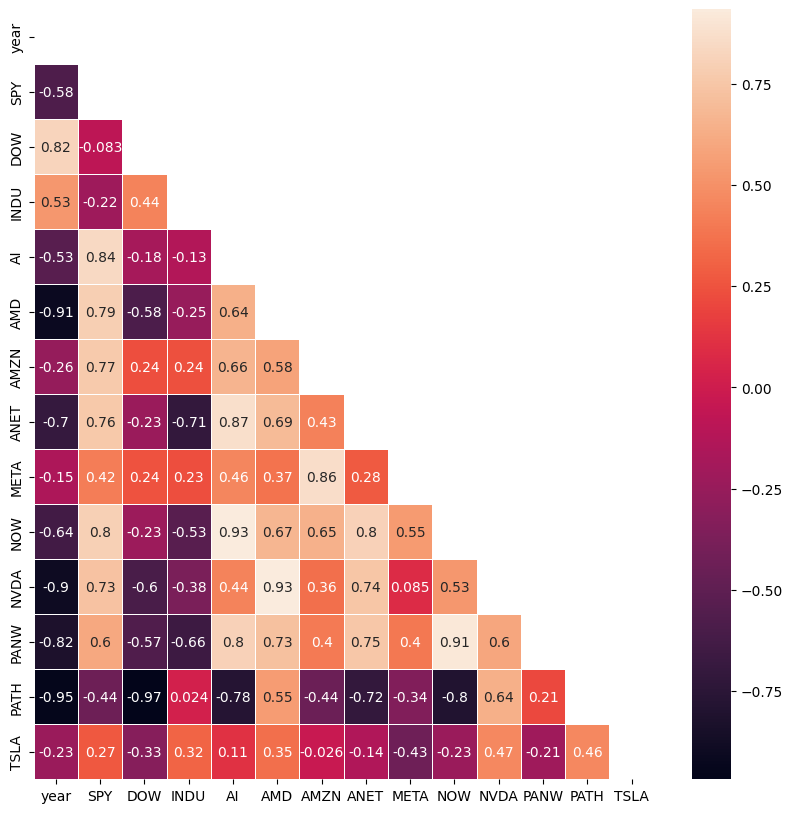

In [10]:
plt.figure(figsize=(10, 10))
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, linewidth=.5, mask=matrix)

plt.savefig('Plots/yearly_cuml_returns_corr_heatmap.png')
